Libraries:

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *
from qiskit_aer import AerSimulator
from qiskit import Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

import numpy as np
from numpy import pi
import math

Functions:

In [2]:
# SUM gate implementation
def SUM(qc, init_qbit):
    
    qc.cx(init_qbit + 1, init_qbit + 2)
    
    qc.cx(init_qbit, init_qbit + 2)
    
    return qc

In [3]:
# CARRY gate implementation
def CARRY(qc, init_qbit):
    
    qc.ccx(init_qbit + 1, init_qbit + 2, init_qbit + 3)
    
    qc.cx(init_qbit + 1, init_qbit + 2)
    
    qc.ccx(init_qbit, init_qbit + 2, init_qbit + 3)
    
    return qc    

In [4]:
# Inverse CARRY gate implementation
def CARRYI(qc, init_qbit):
    
    qc.ccx(init_qbit, init_qbit + 2, init_qbit + 3)
    
    qc.cx(init_qbit + 1, init_qbit + 2)
    
    qc.ccx(init_qbit + 1, init_qbit + 2, init_qbit + 3)
    
    return qc 

In [5]:
# Function encodes given integers onto the circuit for three qubits
def encode_numbers(qc, num1, num2):
    
    # Convert integers to binary representation
    num1_bin = format(num1, '03b')
    num2_bin = format(num2, '03b')
    
    # Map first number to qubits 7, 4, and 1 using Pauli-X gates
    for i in range(3):
        if num1_bin[i] == '1':
            qc.x(7 - i*3)
    
    # Map second number to qubits 8, 5, and 2 using Pauli-X gates
    for i in range(3):
        if num2_bin[i] == '1':
            qc.x(8 - i*3)
    
    return qc

In [6]:
# Extracts result of the QFA and converts it to an integer
def get_result_integer(counts):
    
    for key in counts:
        # Convert the bit string to integers
        bit_9 = int(key[0])
        bit_8 = int(key[1])
        bit_5 = int(key[4])
        bit_2 = int(key[7])
        
        # Compute the final result
        result = bit_9 * 2**3 + bit_8 * 2**2 + bit_5 * 2**1 + bit_2
        
        return result

In [7]:
# Creation of the QFA circuit
def QFA(num1, num2):
    
    qc = QuantumCircuit(10)
    
    encode_numbers(qc, num1, num2)
    
    CARRY(qc, 0)
    CARRY(qc, 3)
    CARRY(qc, 6)
    qc.cx(7, 8)
    SUM(qc, 6)
    CARRYI(qc, 3)
    SUM(qc, 3)
    CARRYI(qc, 0)
    SUM(qc, 0)
    
    qc.measure_all()
    
    return qc

QFA circuit for adding two, 3-qubit numbers:

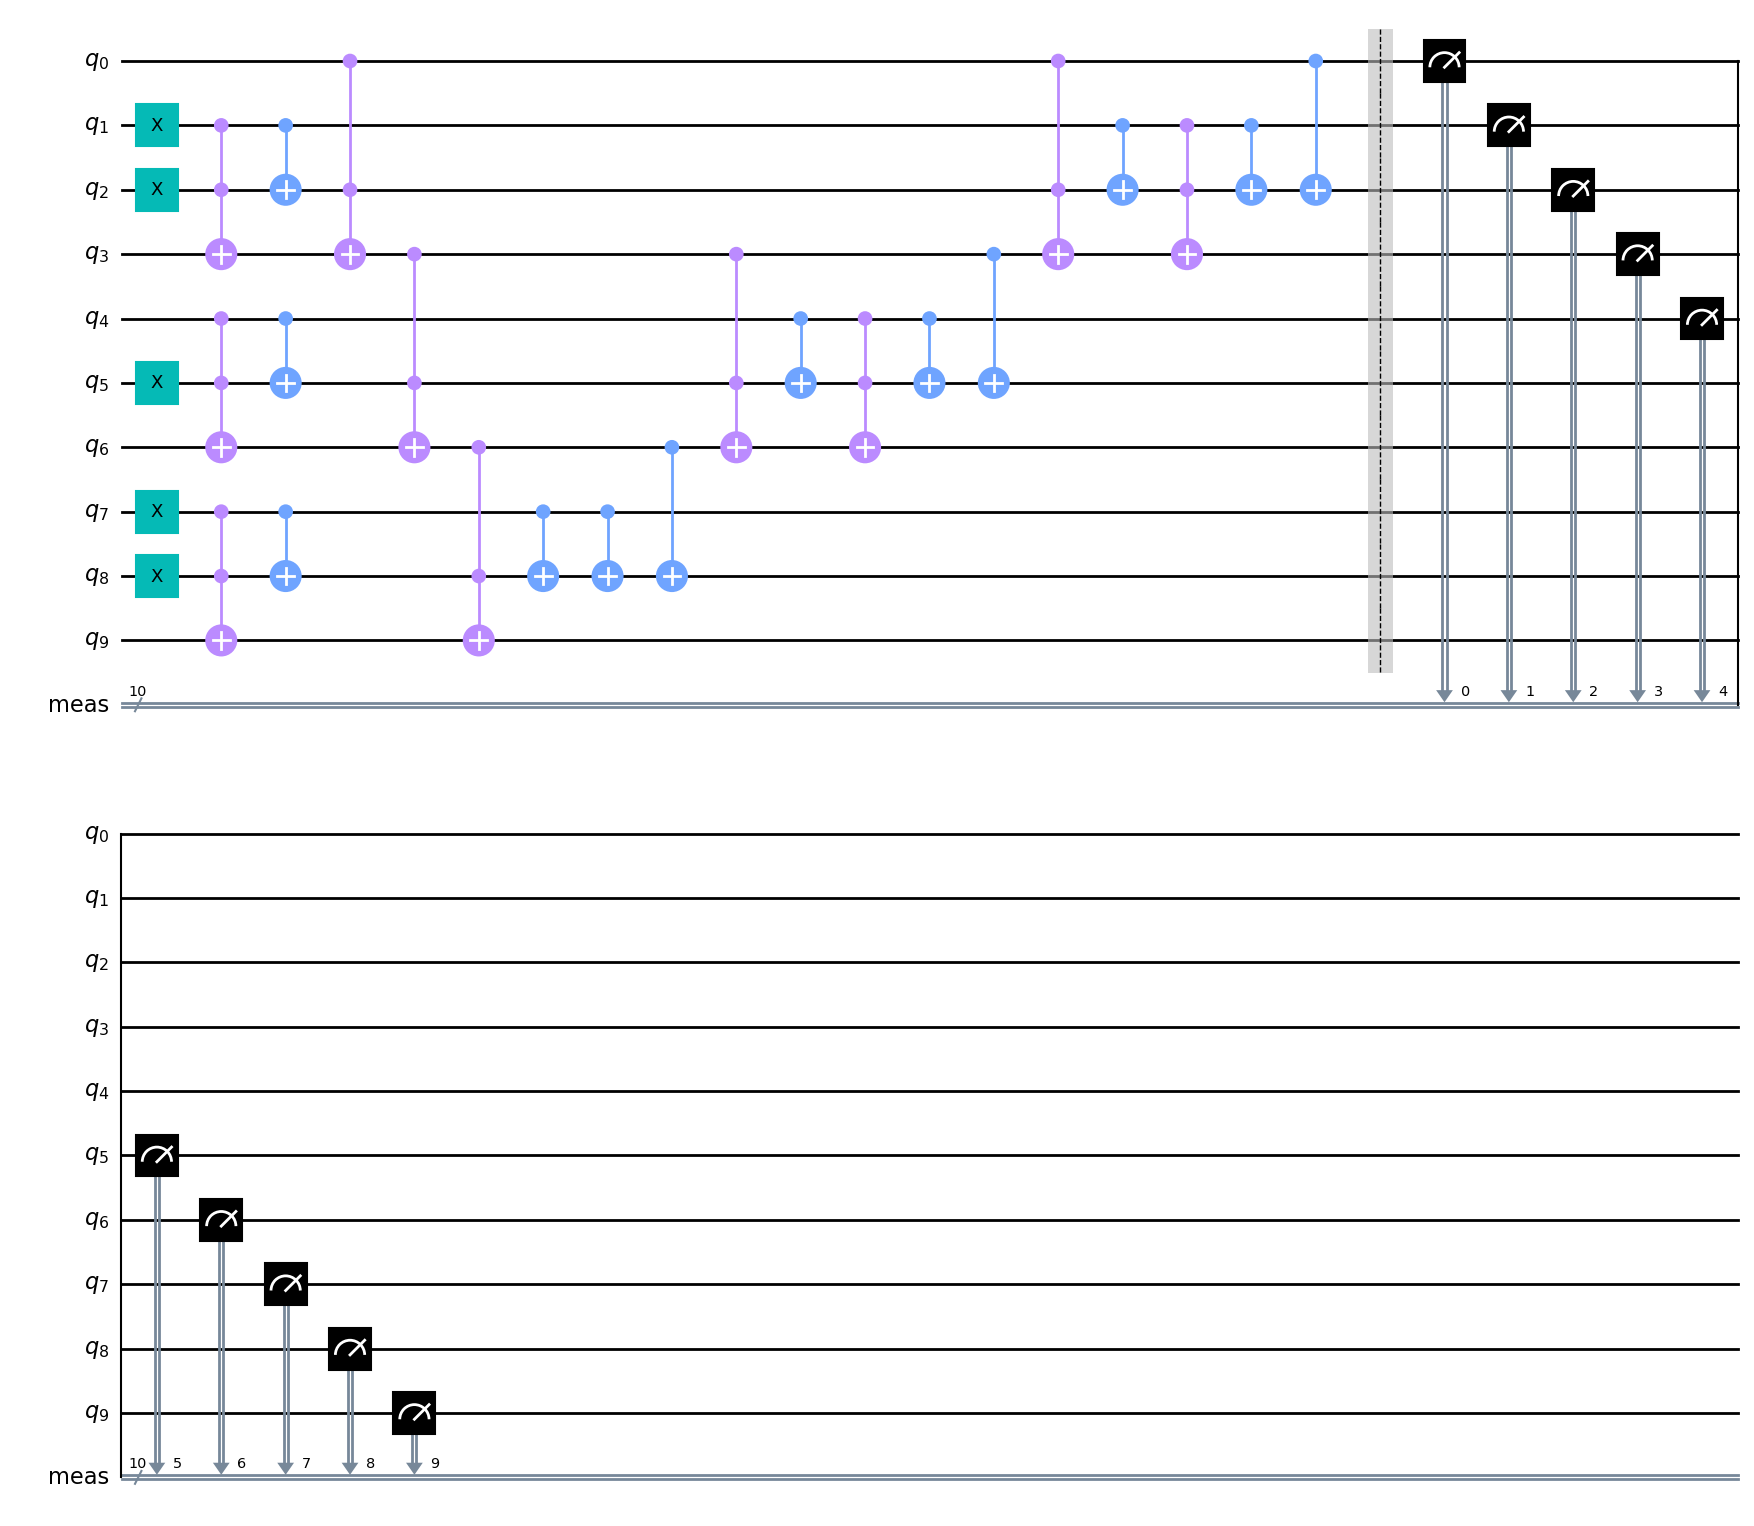

In [8]:
qc = QFA(5, 7)
qc.draw('mpl')

Simulate Results:

In [9]:
backend_sim = Aer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots=2048)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)

{'1110000010': 2048}


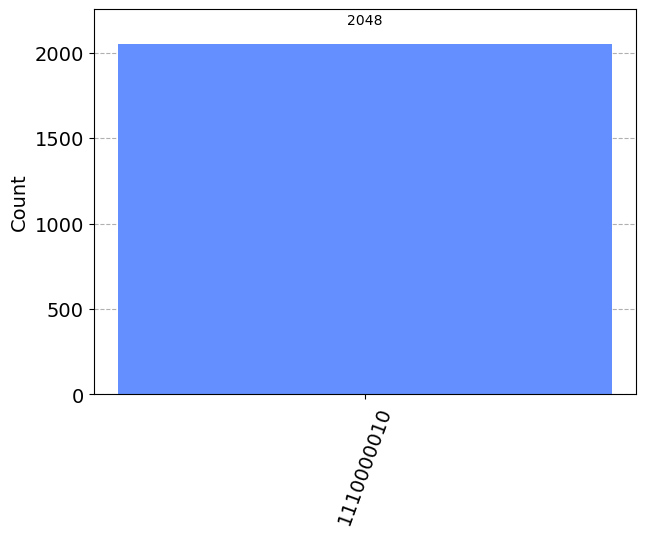

In [10]:
plot_histogram(counts)

In [11]:
num = get_result_integer(counts)
print(f'The result of the QFA is: {num}')

The result of the QFA is: 12
